In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset=tf.keras.datasets.cifar10
(X_train,Y_train),(X_test,Y_test)=dataset.load_data()
(X_train_deep,Y_train_deep),(X_test_deep,Y_test_deep)=dataset.load_data()

170508288/170498071 [==============================] - 2s 0us/step


[4]


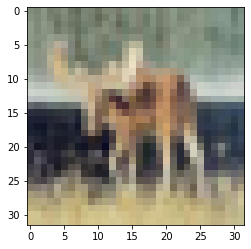

In [3]:
plt.imshow(X_train[28],cmap='gray')
print(Y_train[28])

In [4]:
print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [5]:
print(X_train.shape[1]*X_train.shape[2]*X_train.shape[3])


3072


In [6]:
X_train=X_train.reshape(50000,3072)

In [7]:
X_train,X_valid,Y_train,Y_valid=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [8]:
model=tf.keras.models.Sequential([
    Dense(64,input_dim=3072,activation='relu'),#input_layer
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')#output_layer

])

In [9]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics='accuracy')

In [10]:
model.fit(X_train,Y_train,validation_data=(X_valid,Y_valid),epochs=10)

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 5.1496 - accuracy: 0.1020 - val_loss: 2.3030 - val_accuracy: 0.0933
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3030 - accuracy: 0.1009 - val_loss: 2.3028 - val_accuracy: 0.0996
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.0933
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.1023
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3030 - val_accuracy: 0.0996
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3026 - accuracy: 0.0977 - val_loss: 2.3031 - val_accuracy: 0.0994
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3028 - accuracy: 0.0986 - val_loss: 2.3029 - val_accuracy:

In [12]:
print(X_test.shape)
print(Y_test.shape)
X_test=X_test.reshape(10000,3072)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 1)
(10000, 3072)


In [13]:
accuracy = model.evaluate(X_test,Y_test)

print("accuracy =", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 2.3027 - accuracy: 0.1000
accuracy = [2.302691698074341, 0.10000000149011612]


In [15]:
X_train_deep,X_test_deep = X_train_deep/255.0, X_test_deep/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32,32,3)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_deep,Y_train_deep, epochs=10)
model.evaluate(X_test_deep, Y_test_deep)


Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0745 - accuracy: 0.2451
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9219 - accuracy: 0.3110
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8667 - accuracy: 0.3365
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8234 - accuracy: 0.3513
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7836 - accuracy: 0.3654
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7542 - accuracy: 0.3748
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7305 - accuracy: 0.3823
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7107 - accuracy: 0.3932
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6954 - accuracy: 0.3974
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 1.6316 

[1.631636381149292, 0.4250999987125397]